In [212]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (12, 6) # set the figure size for plots

%matplotlib inline

We will go over basic statistics in this notebook, and apply common exploratory data analysis methods into various datasets.

The most basic estimation of values of a dataset is the mean, where the sum of all values are divided by the number of elements.

Mean = $\large\hat{x} = \frac{\sum_{i=1}^n x_i}{n}$

A slight variation of the mean is the trimmed mean, which is the mean of the values after dropping a certain number of smallest and largest on both sides of the values. 

Trimmed mean = $\large \hat{x} = \frac{\sum_{i=p+1}^{n-p} x_i}{n-2p}$

The trimmed mean diminished the effects of extreme values, and it becomes harder for the remaining elements to affect the score. <br>
Another variation of the mean is the weighted mean. To calculate weighted mean, multiply each element by a user-specified 'weights' and divide their sum by the sum of the weights. <br>
Weighted mean = $\large \hat{x}_w = \frac{\sum_{i=1}^{n} x_iw_i}{\sum_{i=1}^nw_i}$

One of the benefits of the weighted mean is that it allows us to upweight or downweight some datas. For instance, if we want to forecast a stock price based on the historical data, the prices near to the end have more meaning and impact than the prices, say, 10 years before. Another benefit is that we can offset the underrepresented groups by giving them more weights.

Another metric we will frequently use is the median. The median is the middle element of the values. If there is an even number of elements, then the median is the average of the two middle points. Similar to the mean, the weighted median assigns a weight to each element, and then the value such that the sum of weights for the upper and lower parts are equal is the weighted median.

The following dataframe shows the number of deaths and the death rates for different crimes per 100,000 population for each US state. Calculate the mean, the trimmed mean, and the median for the population in 2019 for each state. 

In [159]:
df = pd.read_csv('state_crime.csv')
df

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,179.8,1902.6,300.6,1500.9,222.1,10.1,2.7,...,21.3,1054,11151,1762,8797,1302,59,16,173,125
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


Since we will deal with only with 2019 data, filter out the rest of the years.

In [160]:
df = df[df.Year == 2019]

Check for data types and null values.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 59 to 3114
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          52 non-null     object 
 1   Year                           52 non-null     int64  
 2   Data.Population                52 non-null     int64  
 3   Data.Rates.Property.All        52 non-null     float64
 4   Data.Rates.Property.Burglary   52 non-null     float64
 5   Data.Rates.Property.Larceny    52 non-null     float64
 6   Data.Rates.Property.Motor      52 non-null     float64
 7   Data.Rates.Violent.All         52 non-null     float64
 8   Data.Rates.Violent.Assault     52 non-null     float64
 9   Data.Rates.Violent.Murder      52 non-null     float64
 10  Data.Rates.Violent.Rape        52 non-null     float64
 11  Data.Rates.Violent.Robbery     52 non-null     float64
 12  Data.Totals.Property.All       52 non-null     in

Check the basic statistics about the population and the murder rate columns.

In [162]:
df[['Data.Population', 'Data.Rates.Violent.Murder']].describe()

,Data.Population,Data.Rates.Violent.Murder
count,5.200000e+01,52.000000
mean,1.262460e+07,5.142308
std,4.521733e+07,3.661958
min,5.787590e+05,1.500000
25%,1.790876e+06,2.575000
50%,4.558234e+06,4.600000
75%,7.845050e+06,6.300000
max,3.282395e+08,23.500000


The population column seems to have 328 million as the maximum value, which is probably the total population of the US. Drop this row as we need to focus each state seperately.

In [163]:
df[df['Data.Population'] == max(df['Data.Population'])]

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
2694,United States,2019,328239523,2109.9,340.5,1549.5,219.9,379.4,250.2,5.0,...,81.6,6925677,1117696,5086096,721885,1245410,821182,16425,139815,267988


In [164]:
df = df.drop(2694)

In [166]:
pop_mean = df['Data.Population'].mean()
pop_mean

6436069.0784313725

To calculate trimmed mean, import trim_mean from scipy.stats.

In [167]:
from scipy.stats import trim_mean

trim_mean(df['Data.Population'], 0.1) # cut 10% for each end

4941366.536585365

In [168]:
median = df['Data.Population'].median()
median

4467673.0

The meadian is smaller than the trimmed mean which is smaller than the mean as expected. <br> 
If we need to find the average murder rate for the US in 2019, we need to take into account the different population of each states. This can be achieved by giving a weight for each state based on its population. <br>
Now, calculate weighted mean and weighted median. Weighted mean can be found with numpy while we need wquantiles package for weighted median.

In [169]:
# the weighted mean of murder rate for the US in 2019
np.average(df['Data.Rates.Violent.Murder'], weights=df['Data.Population'])

5.011413349208407

In [170]:
# the weighted median of murder rates
import wquantiles

wquantiles.median(df['Data.Rates.Violent.Murder'], weights=df['Data.Population'])

4.9

### Variability

The difference between each element and the mean of the all data is called deviation. One of the most common way to evaluate variability is to calculate the average of the absolute deviations from the mean. Note that simply taking the average values the deviations would always return zero.

Mean absolute deviation = $\large \frac{\sum_{i=1}^n |x_i - \hat{x}|}{n}$ <br> 
where $\hat{x}$ is the mean of the sample.

The most famous metrics of variability are the variance and the standard deviation. <br> <br>
Variance = $\large \frac{\sum_{i=1}^n (x_i - \hat{x})^2}{n-1}$ <br> <br>
Standard deviation = $\large \sqrt{Variance}$

Since the standard deviation has the same scale as the original data, it is more easy to interpret than variance. Neither the standard deviation, nor the variance is robust agains outliers. In fact, the standard deviation is additionally sensitive to the outliers as we take the squares of the deviations. <br>
The last thing to note is although some sources defines the variance by the diving $n$ instead of $n-1$, since we will generally deal with large datasets, this will not make a huge difference.

Another method to interpret variability is percentiles. Pth percentile is the pth percent of the sorted data. So, the median is the same as 50% percent. The common evaluation of percentiles is the difference between the 75th percentile and the 25th percentile, which is called the interquartile range (IQR). <br><br>
Now, find the standard deviation and the IQR for the US population in 2019.

In [171]:
std = df['Data.Population'].std()
std

7360660.467814472

In [172]:
IQR = df['Data.Population'].quantile(0.75) - df['Data.Population'].quantile(0.25)
IQR

5657199.0

Plot the quarter percentiles of the murder rates.

<AxesSubplot:>

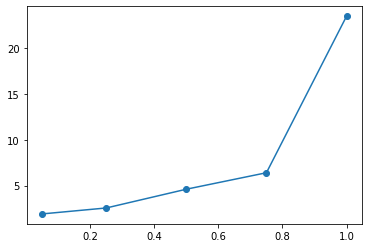

In [173]:
df['Data.Rates.Violent.Murder'].quantile([0.05, 0.25, 0.50, 0.75, 1]).plot(marker='o')

The median (the 50the percentile) is around 5 murders per 100,000 people, and about the 90% of the murder rates are less than 10.

<AxesSubplot:>

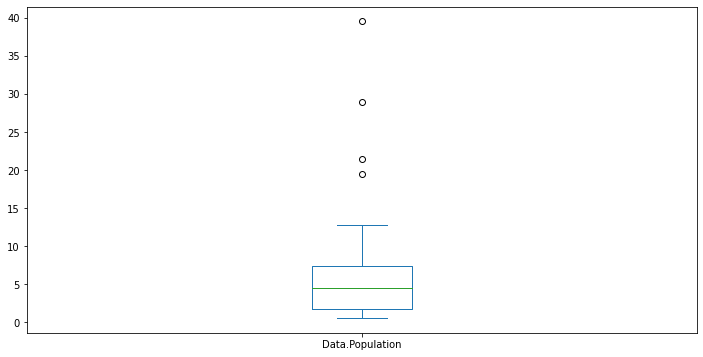

In [175]:
(df['Data.Population'] / 10**6).plot.box(figsize=(12, 6))

We can see that the median state population is around 5 million, with IQR between 2 and 7 million. The straight vertical lines stretching from the box are called whiskers.In matplotlib, whiskers can be 1.5 times of IQR at most. Circle points are generally considered outliers. <br> <br>
Now, find out how many states falls into each 10 population segments of equal lengths. 

In [190]:
pd.cut(df['Data.Population'], 10).value_counts()

(539825.536, 4472105.4]     26
(4472105.4, 8365451.8]      13
(8365451.8, 12258798.2]      6
(12258798.2, 16152144.6]     2
(16152144.6, 20045491.0]     1
(20045491.0, 23938837.4]     1
(27832183.8, 31725530.2]     1
(35618876.6, 39512223.0]     1
(23938837.4, 27832183.8]     0
(31725530.2, 35618876.6]     0
Name: Data.Population, dtype: int64

We see that the population of the vast majority of the states are between 540,000 to 8,400,000. Plot this population distribution as a histogram.

Text(0.5, 0, 'Population in Millions')

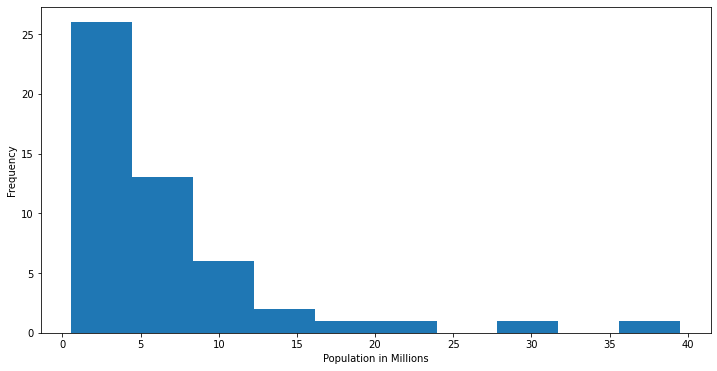

In [189]:
ax = (df['Data.Population'] / 10**6).plot.hist(figsize=(12, 6))
ax.set_xlabel('Population in Millions')

Density plot is computed using the kernel density estimation over the histogram. Plot the KDE density plot for the murder rates.

Text(0.5, 0, 'Murder Rate per 100,000')

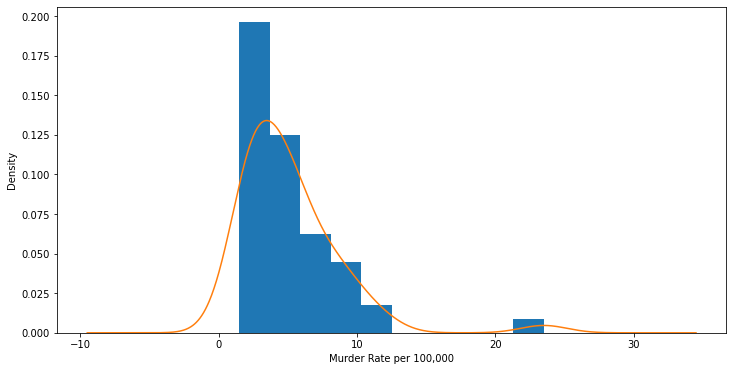

In [196]:
ax = (df['Data.Rates.Violent.Murder']).plot.hist(density=True, figsize=(12, 6))
df['Data.Rates.Violent.Murder'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate per 100,000')

Note that the scale of the y axis has also changed. The total area under the density line is equal to 1, and that area can be computed with the scaled y values.

## Binary and Categorical Data

Import the Maternal Health Risk Data Set from https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set.

In [203]:
df = pd.read_csv('Maternal.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Get the bar chart of the risk levels.

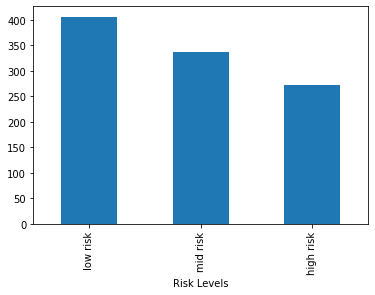

In [213]:
ax = df.RiskLevel.value_counts().plot.bar()
ax.set_xlabel('Risk Levels');

The most common correlation metric is the Pearson's correlation coefficient, which can be computed by multiplying the deviations of two parameters and dividing it by the product of their standard deviations and the number of elements in a sample.

Pearson's correlation coefficient = $\large \frac{\sum_{i=1}^n |x_i - \hat{x}||y_i - \hat{y}|}{(n-1)s_xs_y}$

The coefficient always lies between -1 and 1. The coefficient 1 being perfect positive correlation and -1 is the perfect negative correlation. 0 just indicates there is no correlation between the two variables. <br><br>
Plot the heatmap of the variables in the dataset.

<AxesSubplot:>

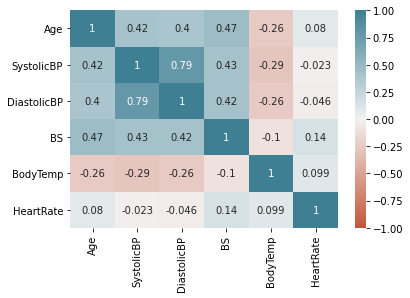

In [217]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Plot the scatter graph for Age and BS columns.

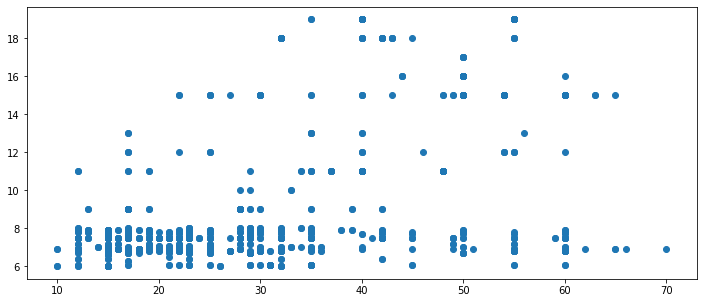

In [221]:
plt.figure(figsize=(12, 5))
plt.scatter(data=df, x='Age', y='BS')

Import the tax-assessed values dataset for residential properties in King County.

In [222]:
df = pd.read_csv('tax.csv')
df

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Scatterplots are appropriate to use when we deal with relatively small dataset. However, when we need to ponder about millions of rows, scatterplots will be too dense to distinguish meaningful patterns. Hexagonal plots came into play in such cases. What hexagonal bining basically does is to plot hexagons whose intensity is based on the number of samples over that hexagon. <br>
Get a hexagonal binning plot of the relationship between the finished squarefeet and the tax-assessed value for homes in King County after applying the following filters.

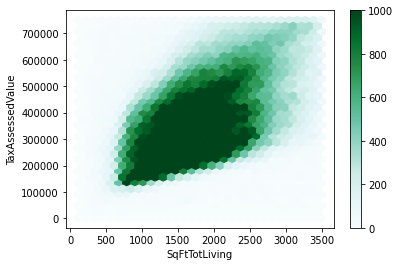

In [255]:
df = df[(df.TaxAssessedValue < 750000) &
 (df.SqFtTotLiving > 100) &
 (df.SqFtTotLiving < 3500)]

ax = df.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', vmax=1000, gridsize=30, sharex=False)

END!! <br><br>
Don't forget to give an upvote if you find this notebook helpful.